In [27]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [28]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [29]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [30]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [55]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine)

In [56]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [58]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [59]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [60]:
# Find the most recent date in the data set.
from sqlalchemy import inspect, func
inspector = inspect(engine)
columns = inspector. get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [85]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
yearly_rain = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
yearly_rain = yearly_rain[0]
# Calculate the date one year from the last date in data set.
last_yr = dt.datetime.strptime(yearly_rain, "%Y-%m-%d")- dt.timedelta(days=366)
# Perform a query to retrieve the data and precipitation scores
query = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_yr).all()
# Save the query results as a Pandas DataFrame. Explicitly set the column names
Precipitation_df = pd.DataFrame(query,columns=['date', 'precipitation'])
# Sort the DataFrame by date
Precipitation_df.set_index('date', inplace=True)
# Use Pandas Plotting with Matplotlib to plot the data
Precipitation_df = Precipitation_df.sort_values(by='date', ascending=True)

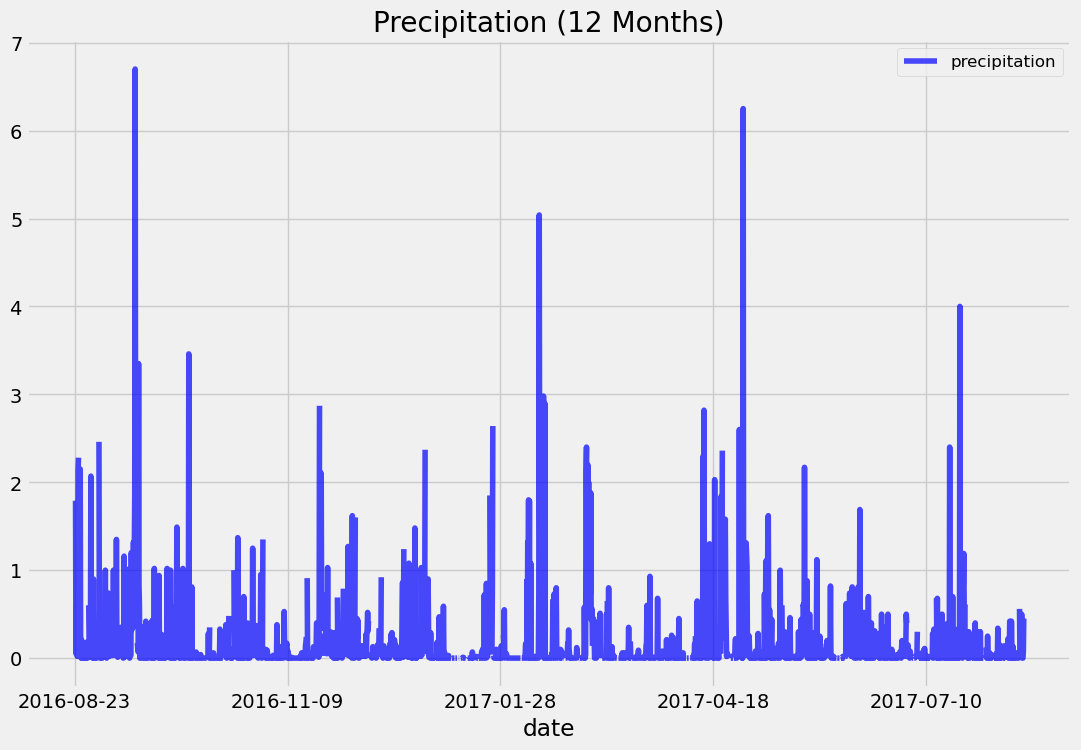

In [86]:
# Use Pandas to calculate the summary statistics for the precipitation data
Precipitation_df.plot(title="Precipitation (12 Months)", color='blue', alpha=0.7, figsize=(12,8))
plt.legend(loc='upper right', prop={'size':12})
plt.savefig("Image_Precipitation.png")
plt.show()

# Exploratory Station Analysis

In [89]:
# Design a query to calculate the total number of stations in the dataset
Total_stations = session.query(Measurement.station).distinct().count()
print(f"Total Stations: {Total_stations}")

Total Stations: 9


In [94]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
Active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

print(f"Most Active Stations")
Active_stations

Most Active Stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [104]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
Most_active_station=Active_stations[0][0]
Most_active_temps=session.query(func.min(Measurement.tobs), 
                                func.max(Measurement.tobs), 
                                func.avg(Measurement.tobs)).filter(Measurement.station == Most_active_station).all()
print(f"Most Active Station Temps")
print(f"Low: {Most_active_temps[0][0]} High: {Most_active_temps[0][1]} Average: {round(Most_active_temps[0][2], 1)}")

Most Active Station Temps
Low: 54.0 High: 85.0 Average: 71.7


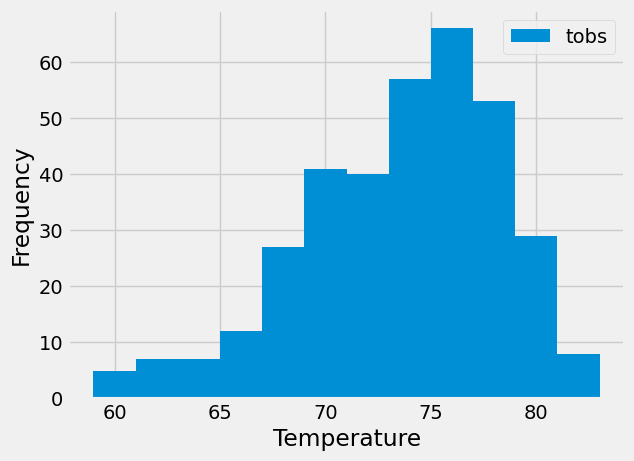

In [109]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
Most_active=session.query(Measurement.tobs).\
    filter(Measurement.station == "USC00519281").\
    filter(Measurement.date >= last_yr).all()
Most_active_df = pd.DataFrame(Most_active, columns=["tobs"])
Most_active_df.plot(kind='hist', bins=12)
plt.xlabel('Temperature')
plt.show()

# Close Session

In [110]:
# Close Session
session.close()